**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: Jeronimo Alvarez Ramirez

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [2]:
from google.colab import drive
drive.mount('/drive')
happiness  = pd.read_csv('/drive/My Drive/Colab Notebooks/happiness_report.csv')
happiness

Mounted at /drive


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice.

In [3]:
mexico = happiness.loc[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region',drop=True,inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto.

Text(Country or region
Mexico    6.595
Name: Score, dtype: float64, 0, 'MEX')

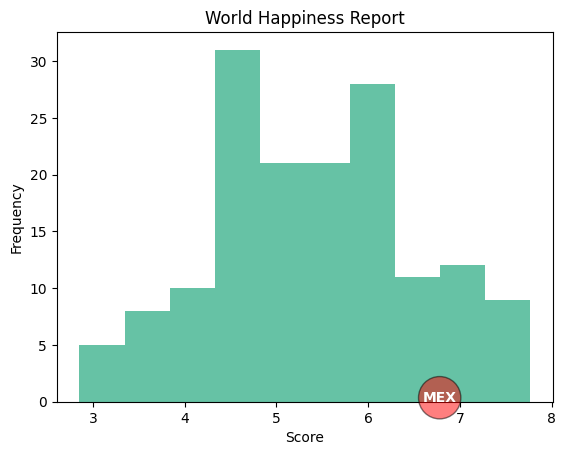

In [55]:
ax = happiness['Score'].plot.hist(xlabel='Score',title='World Happiness Report',color='#66C2A5')
ax.set_xlabel('Score')
props_bbox = {'boxstyle': 'circle','facecolor': 'red', 'alpha': 0.5}
plt.text(mexico['Score'],0,'MEX',color='white',weight='bold',bbox=props_bbox)

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

Text(0.75, Country or region
Mexico    0.761
Name: Healthy life expectancy, dtype: float64, 'MEX')

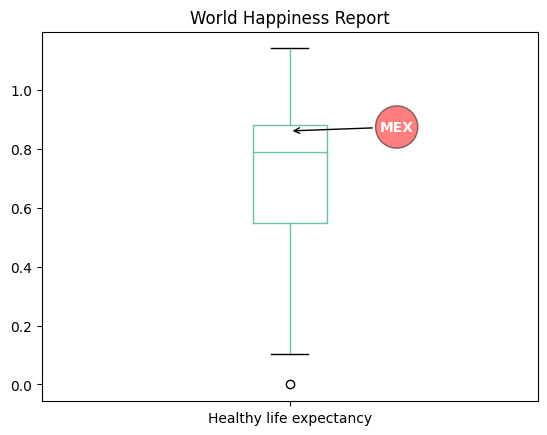

In [54]:
happiness.boxplot(column=['Healthy life expectancy'],color=dict(boxes='#66C2A5', whiskers='#66C2A5', medians='#66C2A5'))
p = plt.gca()
p.set_title('World Happiness Report')
p.tick_params(grid_linestyle='None')

props_bbox = {'boxstyle': 'circle','facecolor': 'red','alpha': 0.5}

plt.annotate('MEX',xy=(1,mexico['Healthy life expectancy']),
            xytext=(0.75, mexico['Healthy life expectancy']-0.1),
             color='white', weight='bold',
            textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->',color='black'),
            horizontalalignment='right',
            verticalalignment='top',
             bbox=props_bbox)

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

In [ ]:
factors = mexico.drop(['Overall rank','Score'],axis=1)
factors = factors.T
factors.columns=['Factors']
factors

,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


<Axes: title={'center': 'Contribution in Mexico happiness score'}>

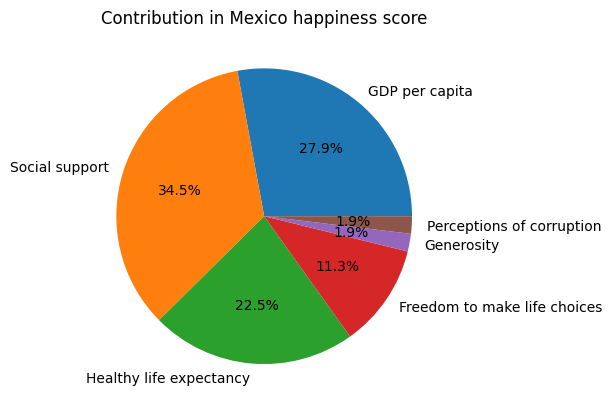

In [ ]:
factors.plot.pie(y='Factors',labels=factors.index,autopct='%1.1f%%',legend='',ylabel='',title='Contribution in Mexico happiness score')

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [ ]:
mex = happiness.loc[happiness['Country or region']=='Mexico']
usa = happiness.loc[happiness['Country or region']=='United States']
china = happiness.loc[happiness['Country or region']=='China']
five = happiness.iloc[[happiness['Overall rank'].min()-1,happiness['Overall rank'].max()-1,int(mex.index[0]),int(usa.index[0]),int(china.index[0])]]
five = five.sort_values(by='Overall rank')
five = five.drop(['Overall rank','Score'],axis=1)
five.set_index('Country or region',drop=True,inplace=True)
five = five.T
five

Country or region,Finland,United States,Mexico,China,South Sudan
GDP per capita,1.340,1.433,1.070,1.029,0.306
Social support,1.587,1.457,1.323,1.125,0.575
Healthy life expectancy,0.986,0.874,0.861,0.893,0.295
Freedom to make life choices,0.596,0.454,0.433,0.521,0.010
Generosity,0.153,0.280,0.074,0.058,0.202
Perceptions of corruption,0.393,0.128,0.073,0.100,0.091


<Axes: title={'center': 'World Happiness Report'}>

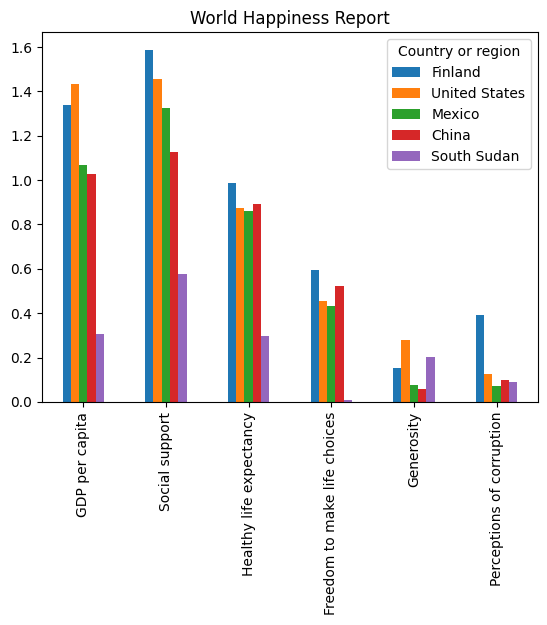

In [ ]:
five.plot(kind='bar',title='World Happiness Report')

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

<Axes: xlabel='Score', ylabel='Perceptions of corruption'>

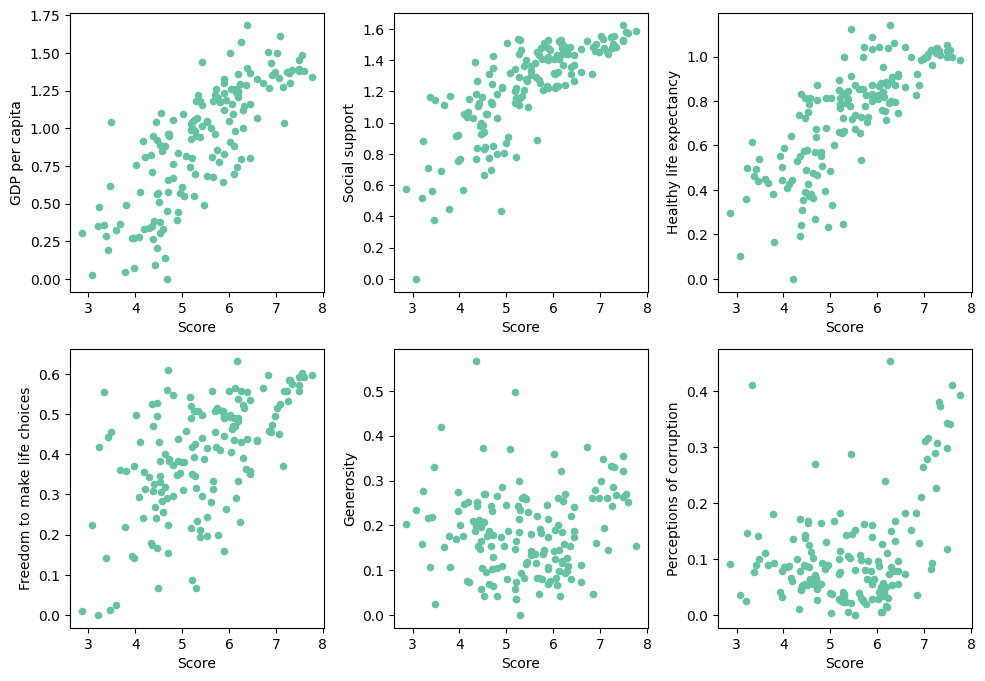

In [16]:
fig,axs = plt.subplots(2,3,figsize=(10,7))
fig.tight_layout(pad=2)
happiness.plot.scatter(x='Score',y='GDP per capita',c='#66C2A5',ax=axs[0,0])
happiness.plot.scatter(x='Score',y='Social support',c='#66C2A5',ax=axs[0,1])
happiness.plot.scatter(x='Score',y='Healthy life expectancy',c='#66C2A5',ax=axs[0,2])
happiness.plot.scatter(x='Score',y='Freedom to make life choices',c='#66C2A5',ax=axs[1,0])
happiness.plot.scatter(x='Score',y='Generosity',c='#66C2A5',ax=axs[1,1])
happiness.plot.scatter(x='Score',y='Perceptions of corruption',c='#66C2A5',ax=axs[1,2])

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<ipython-input-17-6b4ffa2b71be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(happiness.corr(),2),annot=True)


<Axes: >

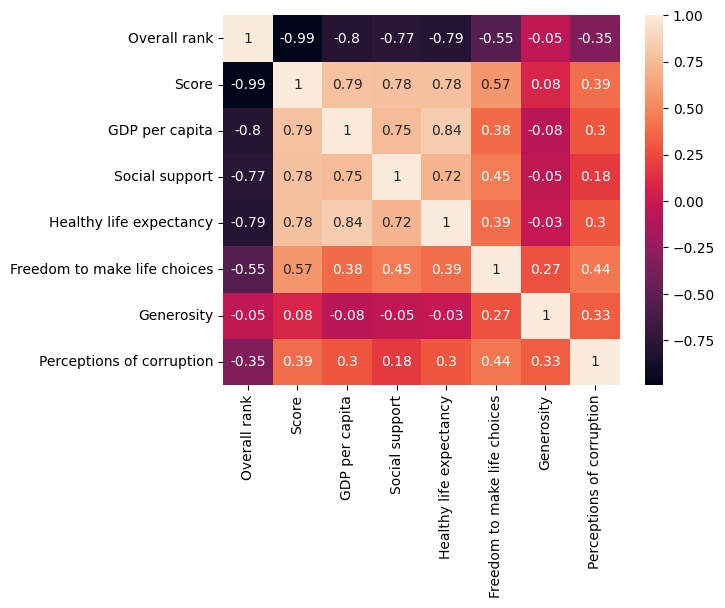

In [17]:
sns.heatmap(round(happiness.corr(),2),annot=True)

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región.

<ipython-input-52-2009d13dbe7e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  myplot = sns.barplot(x='Region',y='Score',data=happiness_region,ci=None)


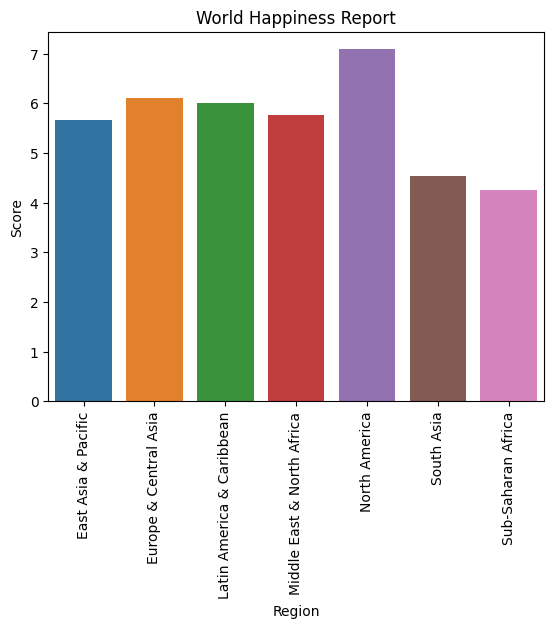

In [52]:
metadata  = pd.read_csv('/drive/My Drive/Colab Notebooks/Metadata.csv')
happiness_region = pd.merge(happiness,metadata,right_on='TableName',left_on='Country or region')
happiness_region = happiness_region.sort_values(by='Region')
myplot = sns.barplot(x='Region',y='Score',data=happiness_region,ci=None)
myplot.set_title('World Happiness Report')
for item in myplot.get_xticklabels():
    item.set_rotation(90)